<a href="https://colab.research.google.com/github/1Anass/ML-for-sustainability/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we take historical energy consumption data from a dataset and we try to create a model that will detect data anomlies in real-time when consumption data will be added.

Overview of dataset:

The dataset has consumption data of 4 years (2018-2021) of electricity, gas, and water of 5 campuses of university La Trobe. The consumption data intervals are as follow:

- electricity: 15min

- gas: 1hr

- water: 15min

The dataset source is: https://github.com/CDAC-lab/UNICON.

**Task 1:** Based on historical data of the dataset, build a model that will detect data anomalies in each new data entry of gas consumption.







We start by loading the dataset gas_consumption_sub.csv from the dataset.

In [ ]:
# Install the changefinder package
!pip install changefinder

import numpy as np
import pandas as pd

# Mount Google Drive (you will be prompted to authenticate)
from google.colab import drive
drive.mount('/content/drive')

# Define the file path in your Google Drive
file_path = '/content/drive/My Drive/UNICON-main/data/gas_consumption_sub.csv'

# Load the data using pandas
data = pd.read_csv(file_path)

# Convert the data to a numpy array
numpy_array = data.to_numpy()
print(numpy_array[:5])



# Now you can work with the 'numpy_array' in your Colab environment


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[1 '2019-01-01 23:00:00' 0.771293945]
 [1 '2019-01-02 22:00:00' 0.765869293]
 [1 '2019-01-03 05:00:00' 0.765924912]
 [1 '2019-01-03 23:00:00' 0.7711243440000001]
 [1 '2019-01-04 10:00:00' 0.694145256]]


Now, for each hour of the day, we plot a graph of gas consumption recorded in this hour through the whole 3 years.


Array 0 (Gas consumption at 00:00):
[(datetime.date(2019, 1, 14), 8.237597167999999), (datetime.date(2019, 1, 15), 13.4739535), (datetime.date(2019, 1, 16), 17.91210607), (datetime.date(2019, 1, 17), 18.67040002), (datetime.date(2019, 1, 18), 14.99909619)]
Array 1 (Gas consumption at 01:00):
[(datetime.date(2019, 1, 14), 9.749944336), (datetime.date(2019, 1, 15), 13.49611971), (datetime.date(2019, 1, 16), 17.90296255), (datetime.date(2019, 1, 17), 17.96074162), (datetime.date(2019, 1, 18), 14.26221015)]


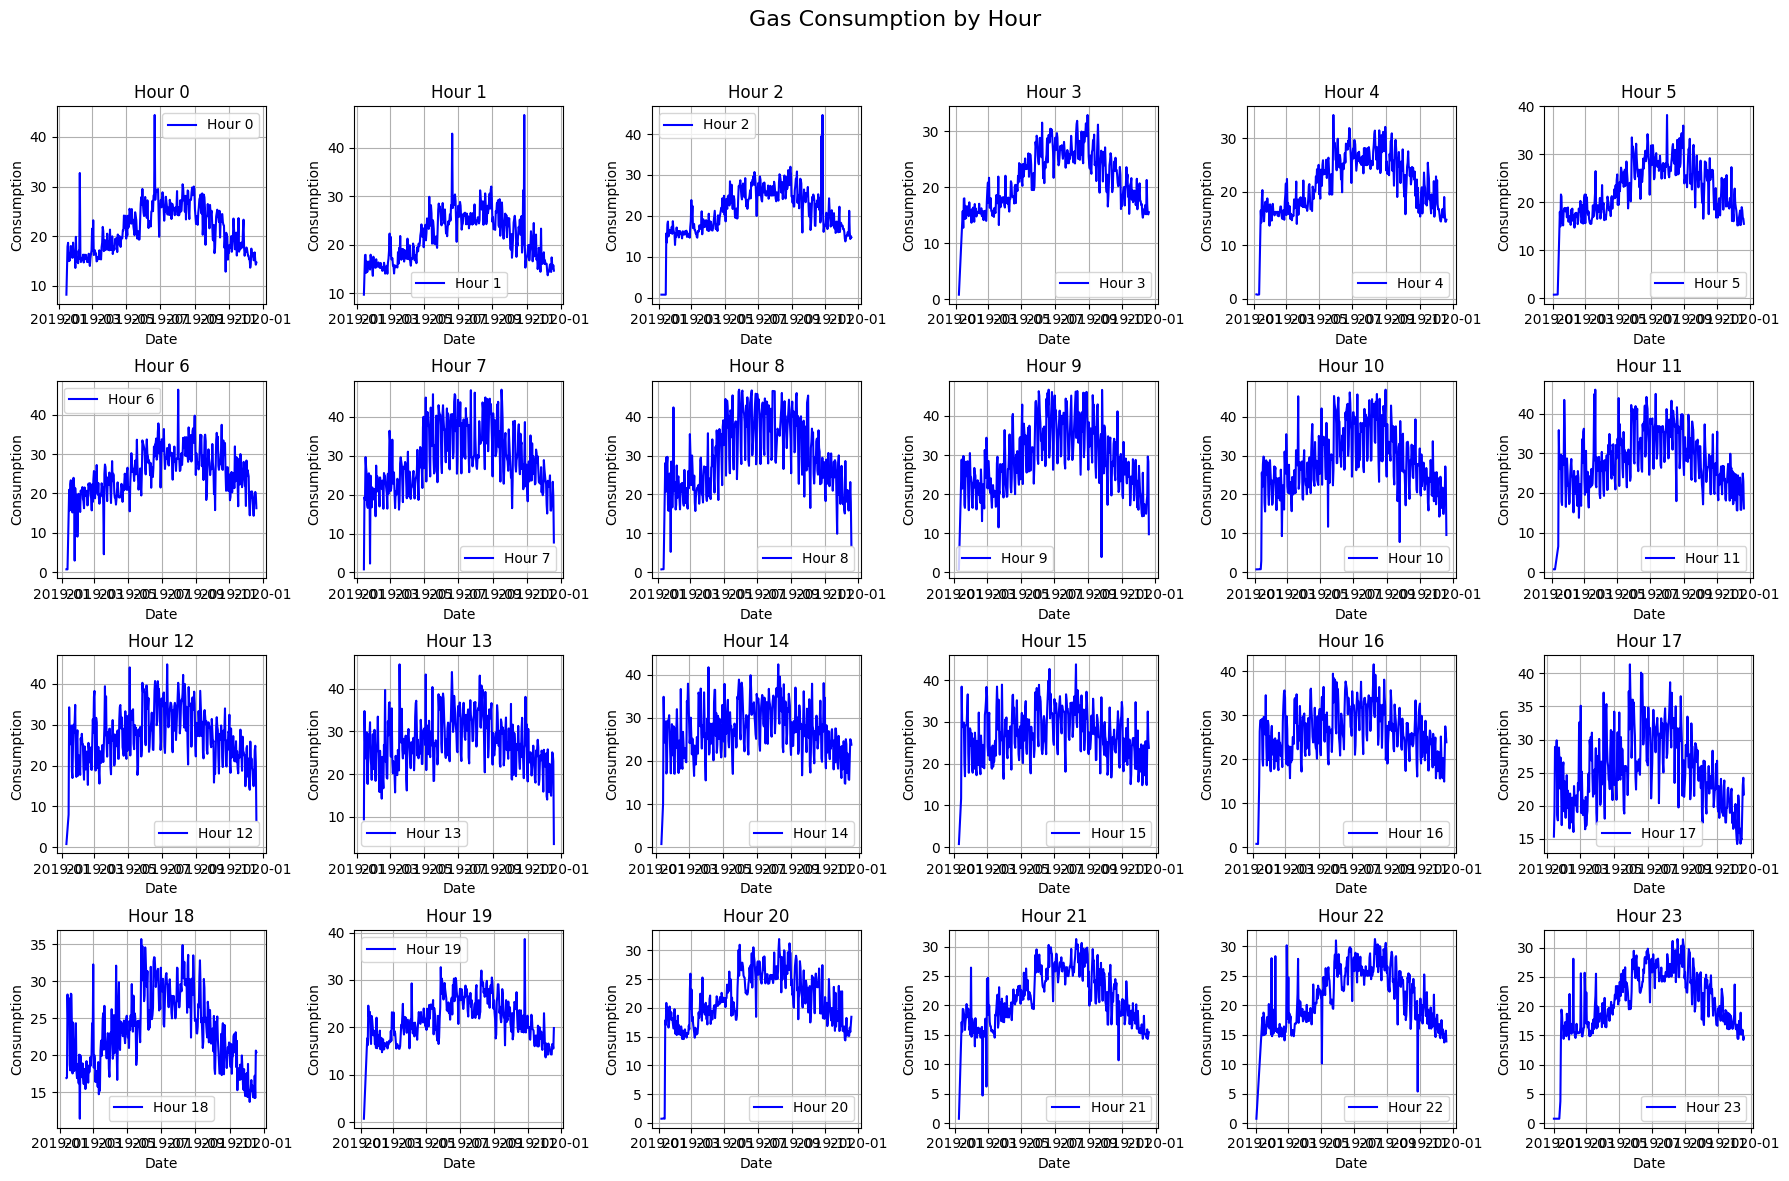

In [ ]:
import numpy as np
from datetime import datetime

# Assuming 'numpy_array' contains your data
# Example format: [1 '2019-01-01 23:00:00' 0.771293945]

# Extract the consumption values and date-time strings from your 'numpy_array'
consumption_values = numpy_array[:, 2].astype(float)
date_times = numpy_array[:, 1]

# Convert date-time strings to datetime objects
date_objects = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in date_times]

# Create 24 lists of tuples, each for a specific hour of the day (0-23)
hourly_consumption_arrays = []

for hour in range(24):
    # Filter data for the current hour
    hour_mask = np.array([date.hour == hour for date in date_objects])
    # Extract date and consumption values for the current hour
    hour_data = [(date.date(), consumption) for date, consumption in zip(np.array(date_objects)[hour_mask], consumption_values[hour_mask])]
    hourly_consumption_arrays.append(hour_data)

# Print the first array (consumption at 00:00)
print("Array 0 (Gas consumption at 00:00):")
print(hourly_consumption_arrays[0][:5])

# Print the second array (consumption at 01:00)
print("Array 1 (Gas consumption at 01:00):")
print(hourly_consumption_arrays[1][:5])

# You can continue to access arrays for other hours as needed

import matplotlib.pyplot as plt

# Create a figure with subplots for each hour
fig, axes = plt.subplots(4, 6, figsize=(18, 12))
fig.suptitle("Gas Consumption by Hour", fontsize=16)

for hour in range(24):
    row, col = divmod(hour, 6)
    ax = axes[row, col]

    # Extract date and consumption data for the current hour
    dates, consumption = zip(*hourly_consumption_arrays[hour])

    # Plot gas consumption with respect to date
    ax.plot(dates, consumption, label=f'Hour {hour}', color='b')
    ax.set_title(f'Hour {hour}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()

# Adjust the layout and spacing of subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()


# Online Change-Point Detection

The objective is to find spikes in gas consumption. In other words, we would like to find data points where the gas consumption was exceptionally different from the usual consumption.

We use the change finder algorithm. We assume that data is generated using the same distribution. Each time data is added, the distribution is updated and a change score is computed. If the change score exceeds a threshold, the data point is considered exceptional.

We do this for each hour interval through the whole three years. The objective is to find days where many hourly energy spikes were detected.

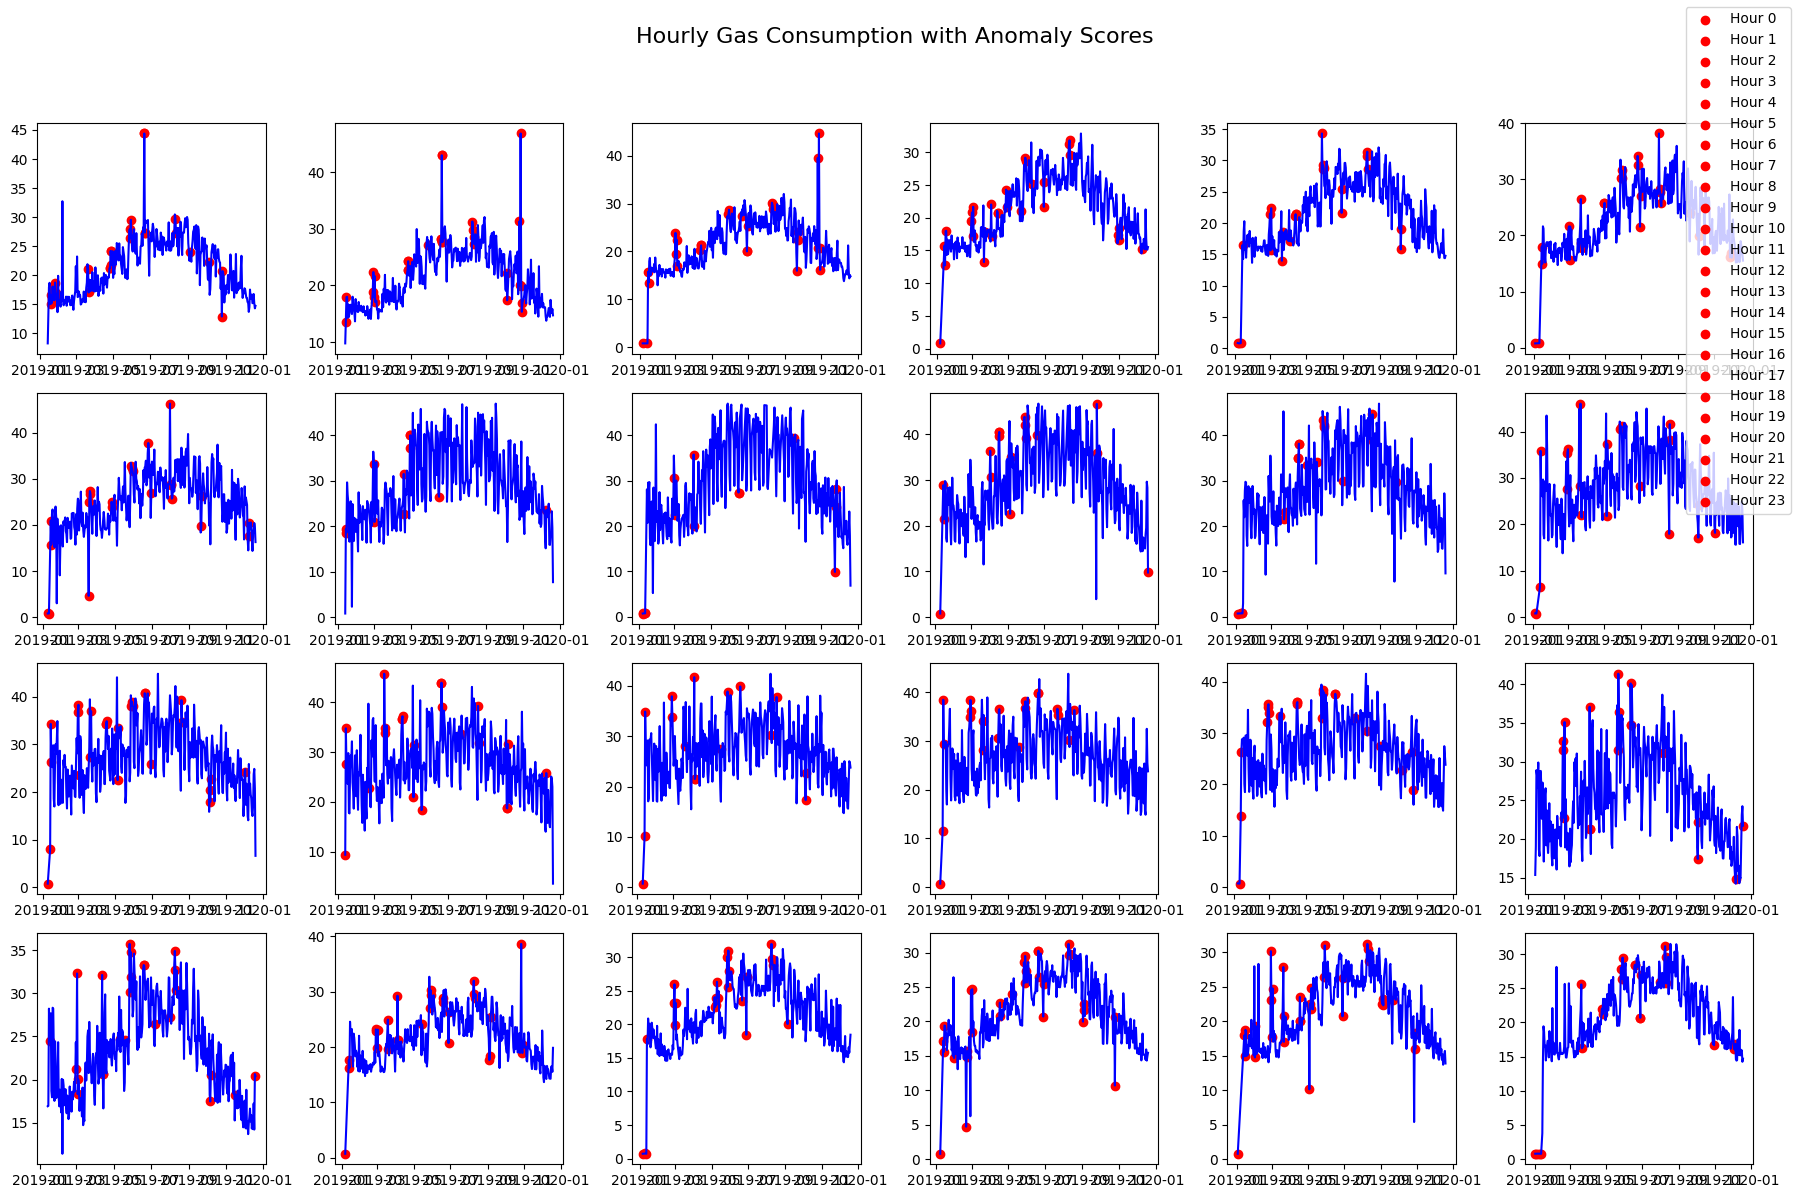

[(datetime.date(2019, 1, 19), 16.58311808), (datetime.date(2019, 1, 20), 15.10472984), (datetime.date(2019, 1, 21), 15.826569500000002), (datetime.date(2019, 1, 22), 18.030539), (datetime.date(2019, 1, 23), 15.81617297), (datetime.date(2019, 1, 24), 17.27120064), (datetime.date(2019, 1, 25), 15.65024121), (datetime.date(2019, 1, 26), 18.71155859), (datetime.date(2019, 1, 27), 16.83841882), (datetime.date(2019, 1, 28), 16.5917027), (datetime.date(2019, 3, 21), 21.01749263), (datetime.date(2019, 3, 22), 17.00660423), (datetime.date(2019, 4, 26), 21.19727676), (datetime.date(2019, 4, 26), 21.19727676), (datetime.date(2019, 4, 27), 24.16388176), (datetime.date(2019, 4, 27), 24.16388176), (datetime.date(2019, 4, 28), 21.79873686), (datetime.date(2019, 5, 28), 27.86426865), (datetime.date(2019, 5, 29), 26.33058202), (datetime.date(2019, 5, 30), 29.51031503), (datetime.date(2019, 6, 21), 44.38742578), (datetime.date(2019, 6, 21), 44.38742578), (datetime.date(2019, 6, 22), 27.32415439), (datet

In [ ]:
import numpy as np
from datetime import datetime
from changefinder import ChangeFinder
import matplotlib.pyplot as plt

# Assuming 'numpy_array' contains your data
# Example format: [1 '2019-01-01 23:00:00' 0.771293945]

# Extract the consumption values and date-time strings from your 'numpy_array'
consumption_values = numpy_array[:, 2].astype(float)
date_times = numpy_array[:, 1]

# Convert date-time strings to datetime objects
date_objects = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in date_times]

# Create 24 lists of tuples, each for a specific hour of the day (0-23)
hourly_consumption_arrays = []

# Create an instance of the ChangeFinder class
cf = ChangeFinder(r=0.1, order=1, smooth=3)

# Define the threshold for anomaly scores
threshold = 5.0  # Adjust this threshold as needed

# Create a figure with subplots for each hour
fig, axes = plt.subplots(4, 6, figsize=(18, 12))
fig.suptitle("Hourly Gas Consumption with Anomaly Scores", fontsize=16)

# Initialize a single legend for all graphs
handles, labels = [], []

all_anomalies = []

for hour in range(24):
    # Filter data for the current hour
    hour_mask = np.array([date.hour == hour for date in date_objects])
    # Extract date and consumption values for the current hour
    hour_data = [(date.date(), consumption) for date, consumption in zip(np.array(date_objects)[hour_mask], consumption_values[hour_mask])]
    hourly_consumption_arrays.append(hour_data)

    # Compute anomaly scores for the consumption values
    consumption_values_hour = [value for _, value in hour_data]
    anomaly_scores_hour = [cf.update(value) for value in consumption_values_hour]

    # Get the indices of data points with anomaly scores above the threshold
    high_anomaly_indices = [i for i, score in enumerate(anomaly_scores_hour) if score > threshold]

    # Extract data for high anomaly points
    high_anomaly_dates = [hour_data[i][0] for i in high_anomaly_indices]
    high_anomaly_consumption = [hour_data[i][1] for i in high_anomaly_indices]

    # Add high anomaly data points to the list of all anomalies
    all_anomalies.extend(zip(high_anomaly_dates, high_anomaly_consumption))


    # Plot gas consumption with respect to date
    row, col = divmod(hour, 6)
    ax = axes[row, col]
    ax.plot([date for date, _ in hour_data], [value for _, value in hour_data], color='b')
    ax.scatter(high_anomaly_dates, high_anomaly_consumption, color='r', marker='o', label=f'Hour {hour}')

    # Add handles and labels for the legend
    handles.append(ax.collections[-1])
    labels.append(f'Hour {hour}')

# Set a single legend for all graphs
fig.legend(handles, labels, loc='upper right')

# Adjust the layout and spacing of subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()

print(all_anomalies[:50])

Now, we plot a graph of days where more than 7 hourly gas consumption spikes were recorded.

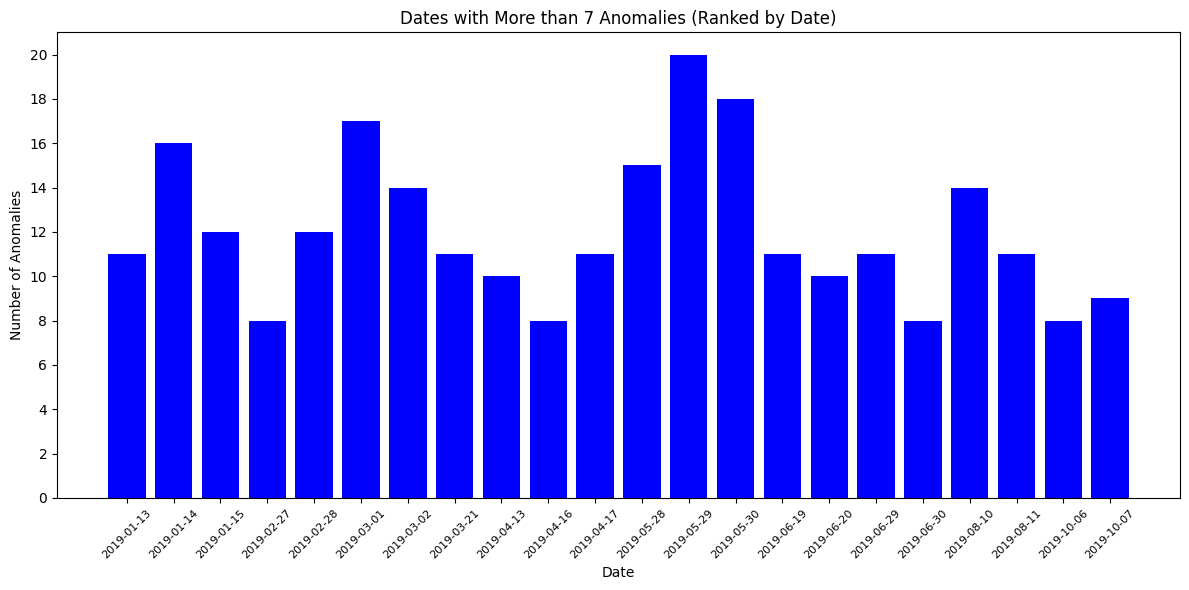

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a dictionary to group anomalies by day
anomalies_by_day = defaultdict(list)

# Populate the dictionary with anomalies
for date, consumption in all_anomalies:
    day = date.strftime('%Y-%m-%d')
    anomalies_by_day[day].append((date, consumption))

# Filter only the days with more than 7 anomalies
filtered_data = {day: len(anomalies) for day, anomalies in anomalies_by_day.items() if len(anomalies) > 7}

# Sort the filtered data by date
sorted_data = dict(sorted(filtered_data.items()))

# Extract dates and anomaly counts
dates = list(sorted_data.keys())
anomaly_counts = list(sorted_data.values())

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(dates, anomaly_counts, color='b')
plt.xlabel('Date')
plt.ylabel('Number of Anomalies')
plt.title('Dates with More than 7 Anomalies (Ranked by Date)')
plt.xticks(rotation=45, fontsize=8)

# Set y-axis ticks to start from 0 and increment by 2
plt.yticks(range(0, max(anomaly_counts) + 1, 2))

plt.tight_layout()

# Show the plot
plt.show()
